In [1]:
import cv2
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline


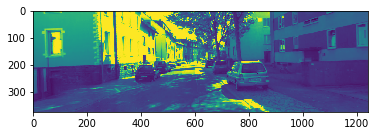

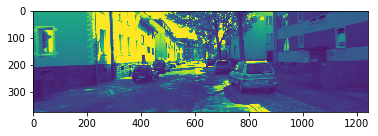

In [2]:
img0 = cv2.imread('img/87.png',0)
img1 = cv2.imread('img/88.png',0)


plt.imshow(img0)
plt.show()
plt.imshow(img1)

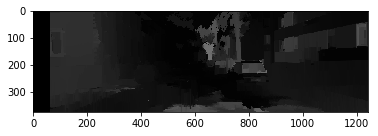

True

In [3]:
# http://timosam.com/python_opencv_depthimage

# disparity settings

window_size = 3                     # wsize default 3; 5; 7 for SGBM reduced size image; 15 for SGBM full size image (1300px and above); 5 Works nicely

stereo = cv2.StereoSGBM_create(
    minDisparity=0,
    numDisparities=64,             # max_disp has to be dividable by 16 f. E. HH 192, 256
    blockSize=5,
    P1=8 * 3 * window_size ** 2,    # wsize default 3; 5; 7 for SGBM reduced size image; 15 for SGBM full size image (1300px and above); 5 Works nicely
    P2=32 * 3 * window_size ** 2,
    disp12MaxDiff=1,
    uniquenessRatio=15,
    speckleWindowSize=0,
    speckleRange=2,
    preFilterCap=63,
    mode=cv2.STEREO_SGBM_MODE_SGBM_3WAY
)

stereo_back = cv2.ximgproc.createRightMatcher(stereo)

# FILTER Parameters
lmbda = 50000
sigma = 1.2
visual_multiplier = 1.0
 
wls_filter = cv2.ximgproc.createDisparityWLSFilter(matcher_left=stereo)
wls_filter.setLambda(lmbda)
wls_filter.setSigmaColor(sigma)


# morphology settings
kernel = np.ones((10,10),np.uint8)

# compute disparity
disparity = stereo.compute(img0, img1).astype(np.int16)
disparity_back = stereo_back.compute(img1, img0).astype(np.int16)

filteredImg = wls_filter.filter(disparity, img0, None, disparity_back)

filteredImg = cv2.normalize(src=filteredImg, dst=filteredImg, beta=0, alpha=255, norm_type=cv2.NORM_MINMAX);
filteredImg = np.uint8(filteredImg)


morphology = cv2.morphologyEx(disparity, cv2.MORPH_OPEN, kernel)
plt.imshow(filteredImg,'gray')
plt.show()
cv2.imwrite('img/out1.png',filteredImg)

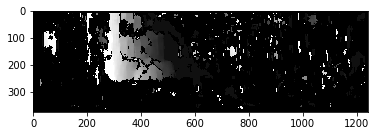

True

In [4]:
stereo = cv2.StereoBM_create(numDisparities=16, blockSize=21)
disparity = stereo.compute(img0,img1)
plt.imshow(disparity,'gray')
plt.show()
cv2.imwrite('img/out.png',disparity)

In [24]:
grid = np.mgrid[0:img0.shape[1], 0:img0.shape[0]]
grid = np.swapaxes(grid,0,2)
print(filteredImg.shape)
print(grid.shape)

grid = np.dstack((grid,filteredImg)) #add this to z-distance
print(len(grid))

print(grid.shape)
print(filteredImg.shape)
print(grid[100,100])
print(filteredImg[100,100])

(375, 1242)
(375, 1242, 2)
375
(375, 1242, 3)
(375, 1242)
[100 100  48]
48
